In [6]:
import os
# while not os.path.exists("./bridge_net"):
#     %cd ..

In [7]:
import numpy as np

import yaml

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [8]:
type1_rel_acc = {
    "tin200": {
        "de": [
            (1.000, (91.30, 0.10)),
            (2.000, (92.72, 0.13)),
            (3.000, (93.06, 0.14)),
            (4.000, (93.51, 0.19)),
            (5.000, (93.61, 0.11)),
            (7.000, (93.84, 0.06)),
            (9.000, (94.00, 0.00)),
        ],
        "bridge": [
            (1.000, (91.30, 0.10)),
            (2.000, (91.77, 0.04))
        ],
        "dbn": [
            (1.000, (91.30, 0.10)),
            (2.000, (92.81, 0.10)),
            (3.000, (93.01, 0.03)),
            (5.000, (93.04, 0.14)),
            (8.000, (92.94, 0.06)),
        ],
        "ed": [
            (1.000, (91.30, 0.10)),
            (3.000, (91.96, 0.42)),
            (5.000, (91.86, 0.21)),
            (7.000, (91.97, 0.14)),
        ],
        "end2": [
            (1.000, (91.30, 0.10)),
            (3.000, (91.99, 0.42)),
            (5.000, (92.11, 0.21)),
            (7.000, (91.97, 0.26)),
        ]
    }
}


In [9]:
type1_rel_ece = {
    "tin200": {
        "de": [
            (1.000, (1.000, 0.000)),
            (2.000, (2.000, 0.000)),
            (3.000, (3.000, 0.000)),
            (4.000, (4.000, 0.000)),
            (5.000, (5.000, 0.000)),
            (6.000, (6.000, 0.000)),
            (7.000, (7.000, 0.000)),
            (8.000, (8.000, 0.000)),
            (9.000, (9.000, 0.000)),
        ],
        "bridge": [
            (1.000, (1.000, 0.000)),
            (2.000, (1.871, 0.000)),
        ],
        "dbn": [
            (1.000, (1.000, 0.000)),
            (2.000, (1.961, 0.000)),
            (3.000, (2.325, 0.000)),
            (5.000, (2.363, 0.000)),
            (8.000, (2.468, 0.000)),
        ],
        "ed": [
            (1.000, (0.5, 0.)),
            (3.000, (0.5, 0.)),
            (5.000, (0.5, 0.)),
            (7.000, (0.5, 0.)),
        ],
        "end2": [
            (1.000, (0.5, 0.)),
            (3.000, (0.5, 0.)),
            (5.000, (0.5, 0.)),
            (7.000, (0.5, 0.)),
        ]
    }
}


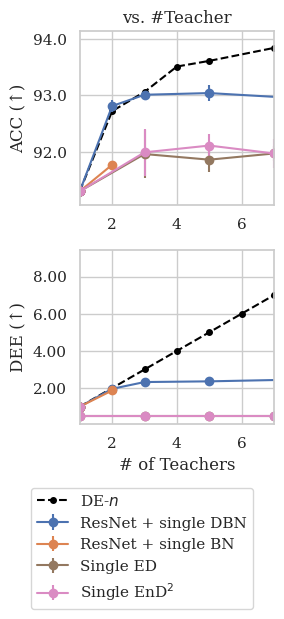

In [32]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(3, 5), squeeze=False)

c1 = sns.color_palette("deep")[1]
c2 = sns.color_palette("deep")[0]
c3 = sns.color_palette("deep")[5]
c4 = sns.color_palette("deep")[6]

ax[0, 0].set_title("vs. #Teacher")

ax[1, 0].set_xlabel("# of Teachers")

ax[0, 0].set_ylabel("ACC (↑)")
ax[1, 0].set_ylabel("DEE (↑)")

ax[0, 0].set_xlim(1., 7.)
ax[1, 0].set_xlim(1., 7.)

ax[0, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))

ax[0, 0].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax[1, 0].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))


ax[0, 0].plot(
    [v[0]    for v in type1_rel_acc["tin200"]["de"]],
    [v[1][0] for v in type1_rel_acc["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[1, 0].plot(
    [v[0]    for v in type1_rel_ece["tin200"]["de"]],
    [v[1][0] for v in type1_rel_ece["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)


ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["dbn"]],
    label="ResNet + single DBN", color=c2, linestyle="-",  marker=".", markersize=12,
)
ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["bridge"]],
    label="ResNet + single BN", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["ed"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["ed"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["ed"]],
    label="Single ED", color=c3, linestyle="-",  marker=".", markersize=12,
)
ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["end2"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["end2"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["end2"]],
    label="Single EnD$^2$", color=c4, linestyle="-",  marker=".", markersize=12,
)



ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["dbn"]],
    label="ResNet + single DBN", color=c2, linestyle="-",  marker=".", markersize=12,
)
ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["bridge"]],
    label="ResNet + single BN", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["ed"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["ed"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["ed"]],
    label="Single ED", color=c3, linestyle="-",  marker=".", markersize=12,
)
ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["end2"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["end2"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["end2"]],
    label="Single EnD$^2$", color=c4, linestyle="-",  marker=".", markersize=12,
)



handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=1, bbox_to_anchor=(0.5, -0.25))
fig.tight_layout()
fig.show()
fig.savefig("figures/capacity.pdf", bbox_inches="tight")